<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/13_15_Image_Generator_and_Fit_Generator_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
import keras

In [5]:
keras.__version__

'2.15.0'

### 1. Importing Libraries and Data preprocessing

In [6]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls /content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/*jpg |wc -l

2352


In [8]:
# set seed
seed = 42

In [9]:
# load csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [10]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


## Image Augmentation using Keras (ImageDataGenerator)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40,
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [14]:
image_augmentation.fit(X_train)

### 2. Model Building

In [15]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [16]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate = 1e-5)

In [17]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [18]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

<ipython-input-18-de442eb42c9e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)


Epoch 1/50
13/13 [==============================] - 20s 1s/step - loss: 1.0780 - accuracy: 0.5255 - val_loss: 0.7383 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 17s 1s/step - loss: 0.9710 - accuracy: 0.5559 - val_loss: 0.7386 - val_accuracy: 0.4391
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 0.9488 - accuracy: 0.5826 - val_loss: 0.7212 - val_accuracy: 0.4391
Epoch 4/50
13/13 [==============================] - 16s 1s/step - loss: 0.9487 - accuracy: 0.5608 - val_loss: 0.7213 - val_accuracy: 0.4391
Epoch 5/50
13/13 [==============================] - 16s 1s/step - loss: 0.9420 - accuracy: 0.5717 - val_loss: 0.7125 - val_accuracy: 0.4391
Epoch 6/50
13/13 [==============================] - 16s 1s/step - loss: 0.8973 - accuracy: 0.5680 - val_loss: 0.7128 - val_accuracy: 0.4391
Epoch 7/50
13/13 [==============================] - 17s 1s/step - loss: 0.9655 - accuracy: 0.5358 - val_loss: 0.7059 - val_accuracy: 0.4419
Epoch 8/50
13/13 [==

23/23 [==============================] - 0s 7ms/step


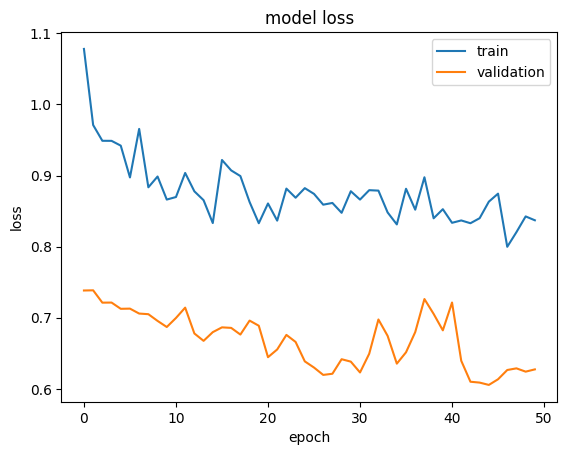

In [19]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred<0.5, 0, 1)# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

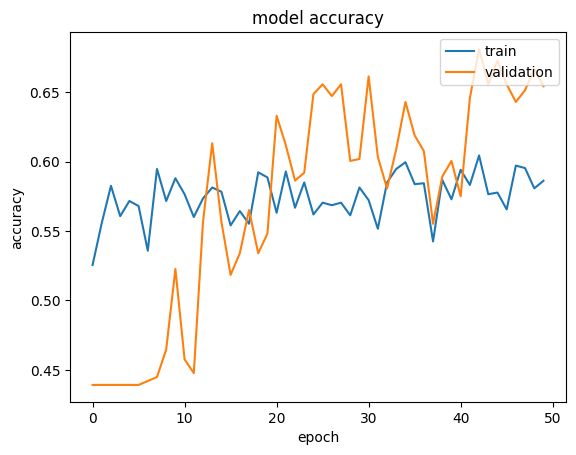

In [20]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
y_train_pred = model.predict(X_train)[:,0]
y_train_pred = np.where(y_train_pred<0.5, 0, 1)

52/52 [==============================] - 0s 7ms/step


In [22]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred<0.5, 0, 1)

23/23 [==============================] - 0s 8ms/step


In [23]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('\nValidation Accuracy: ', accuracy_score(y_valid, y_pred))

Training Accuracy:  0.68408262454435

Validation Accuracy:  0.6543909348441926
